In [24]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import Audio

In [25]:
data_path = "results"

In [69]:
results_dfs = {
    "whisper_tiny": pd.read_parquet(os.path.join(data_path, "whisper_tiny_results_df.parquet")),
    "whisper_small": pd.read_parquet(os.path.join(data_path, "whisper_small_results_df.parquet")),
    "whisper_base": pd.read_parquet(os.path.join(data_path, "whisper_base_results_df.parquet")),
    "whisper_medium": pd.read_parquet(os.path.join(data_path, "whisper_medium_results_df.parquet")),
    "whisper_large_v3": pd.read_parquet(os.path.join(data_path, "whisper_large-v3_results_df.parquet")),
    "dist_whisper_large_v3": pd.read_parquet(os.path.join(data_path, "primeline_distil_whisper_large_v3_german_results_df.parquet")),
    "whisperx_large_v3": pd.read_parquet(os.path.join(data_path, "whisperx_results_df.parquet")),
    "wav2vec": pd.read_parquet(os.path.join(data_path, "wav2vec_results_df.parquet")),
}

metrics_dfs = {
    "whisper_tiny": pd.read_parquet(os.path.join(data_path, "whisper_tiny_metrics_df.parquet")),
    "whisper_small": pd.read_parquet(os.path.join(data_path, "whisper_small_metrics_df.parquet")),
    "whisper_base": pd.read_parquet(os.path.join(data_path, "whisper_base_metrics_df.parquet")),
    "whisper_medium": pd.read_parquet(os.path.join(data_path, "whisper_medium_metrics_df.parquet")),
    "whisper_large_v3": pd.read_parquet(os.path.join(data_path, "whisper_large-v3_metrics_df.parquet")),
    "dist_whisper_large_v3": pd.read_parquet(os.path.join(data_path, "primeline_distil_whisper_large_v3_german_metrics_df.parquet")),
    "whisperx_large_v3": pd.read_parquet(os.path.join(data_path, "whisperx_metrics_df.parquet")),
    "wav2vec": pd.read_parquet(os.path.join(data_path, "wav2vec_metrics_df.parquet")),
}

metrics_dfs = pd.DataFrame({
    "Model": list(metrics_dfs.keys()),
    "WER": [df["wer"].values[0] for df in metrics_dfs.values()],
    "CER": [df["cer"].values[0] for df in metrics_dfs.values()],
    "WIL": [df["wil"].values[0] for df in metrics_dfs.values()],
    "WIP": [df["wip"].values[0] for df in metrics_dfs.values()],
    "ED": [df["ed"].values[0] for df in metrics_dfs.values()],
})

data_df = pd.read_parquet(os.path.join(data_path, "yt_df_filtered.parquet"))

data_df.head(3)

video_id                                 video_path  \
0  u1upVtXcrdo  F:/BIG_FILES/AI_DATA/2024_STT\u1upVtXcrdo   
1  5EkeDBfYimI  F:/BIG_FILES/AI_DATA/2024_STT\5EkeDBfYimI   
2  FRuyzfNw-i8  F:/BIG_FILES/AI_DATA/2024_STT\FRuyzfNw-i8   

                                     video_url  \
0  https://www.youtube.com/watch?v=u1upVtXcrdo   
1  https://www.youtube.com/watch?v=5EkeDBfYimI   
2  https://www.youtube.com/watch?v=FRuyzfNw-i8   

                                        segment_path  \
0  F:/BIG_FILES/AI_DATA/2024_STT\u1upVtXcrdo\segm...   
1  F:/BIG_FILES/AI_DATA/2024_STT\5EkeDBfYimI\segm...   
2  F:/BIG_FILES/AI_DATA/2024_STT\FRuyzfNw-i8\segm...   

                                     transcript_path  segment_duration  \
0  F:/BIG_FILES/AI_DATA/2024_STT\u1upVtXcrdo\tran...            24.070   
1  F:/BIG_FILES/AI_DATA/2024_STT\5EkeDBfYimI\tran...            19.101   
2  F:/BIG_FILES/AI_DATA/2024_STT\FRuyzfNw-i8\tran...            20.360   

                                          transcript  num_words  
0  So sieht jetzt mein Make-up aus, ich bin jetzt...         41  
1  Ziel. Wie genau wir dahin kommen, ist mir egal...         54  
2  Das sind manchmal ganz verrückte Momente. Also...         79

In [70]:
# print some stats
print(f"Amount of data: {len(data_df)}")
print(f"Total length of audio: {data_df['segment_duration'].sum() / 3600:.2f} hours")
print(f"Total number of words: {data_df['num_words'].sum()}")

sample_audio = data_df.sample(1)
sample_transcript = sample_audio["transcript"].values[0]
sample_audio_path = sample_audio["segment_path"].values[0]
print(f"Sample transcript: {sample_transcript}")
display(Audio(sample_audio_path))

Amount of data: 592
Total length of audio: 3.43 hours
Total number of words: 30299
Sample transcript: Die Attacke ist hochkomplex, das Unternehmen kann sich nicht wehren und zieht den Stecker. EncroChat nimmt das gesamte Netzwerk offline. Nutzer sollen ihre Handys ausschalten und wegwerfen. Damn, was ist hier passiert? Gehen wir einen Schritt zurück. Die französische Gendarmerie


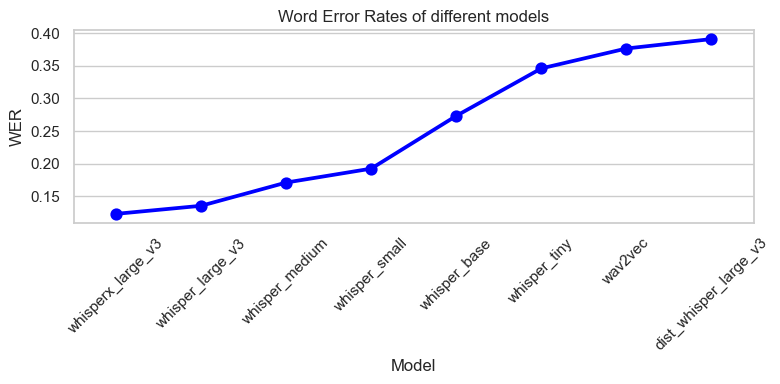

In [71]:
wers_df = metrics_dfs.sort_values("WER")

plt.figure(figsize=(8, 4)); sns.set_theme(style="whitegrid")
sns.pointplot(data=wers_df, x="Model", y="WER", color="blue")
plt.xticks(rotation=45)
plt.title("Word Error Rates of different models")
plt.tight_layout()
plt.show()

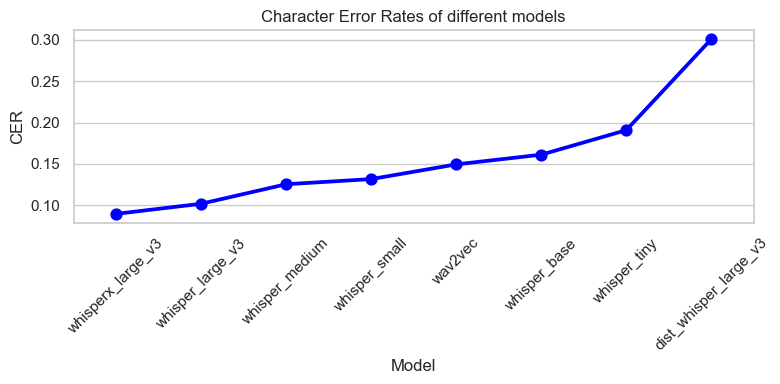

In [72]:
cers_df = metrics_dfs.sort_values("CER")

plt.figure(figsize=(8, 4)); sns.set_theme(style="whitegrid")
sns.pointplot(data=cers_df, x="Model", y="CER", color="blue")   
plt.xticks(rotation=45)
plt.title("Character Error Rates of different models")
plt.tight_layout()
plt.show()

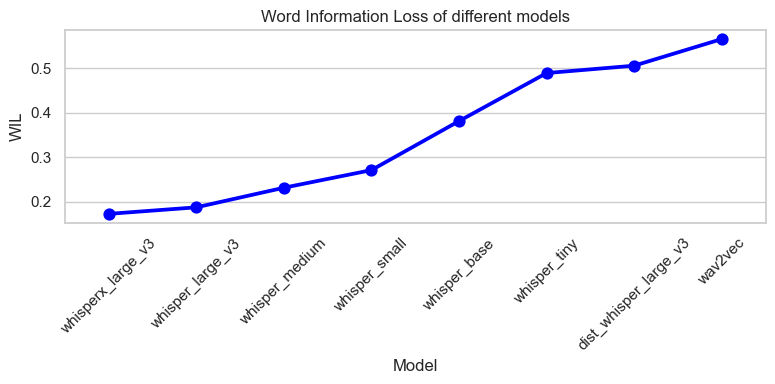

In [73]:
wils_df = metrics_dfs.sort_values("WIL")

plt.figure(figsize=(8, 4)); sns.set_theme(style="whitegrid")
sns.pointplot(data=wils_df, x="Model", y="WIL", color="blue")
plt.xticks(rotation=45)
plt.title("Word Information Loss of different models")
plt.tight_layout()
plt.show()

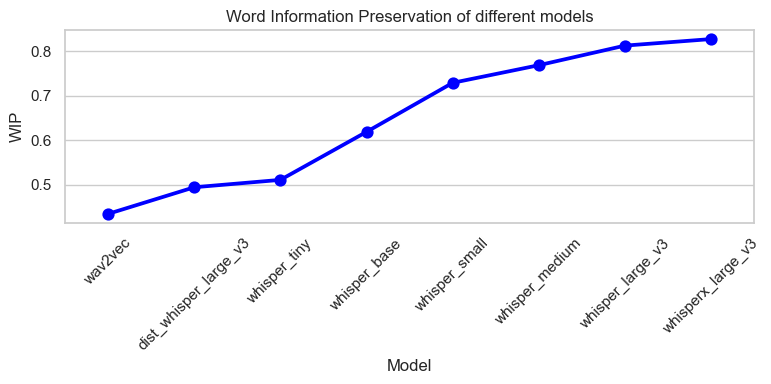

In [74]:
wips_df = metrics_dfs.sort_values("WIP")

plt.figure(figsize=(8, 4)); sns.set_theme(style="whitegrid")
sns.pointplot(data=wips_df, x="Model", y="WIP", color="blue")
plt.xticks(rotation=45)
plt.title("Word Information Preservation of different models")
plt.tight_layout()
plt.show()

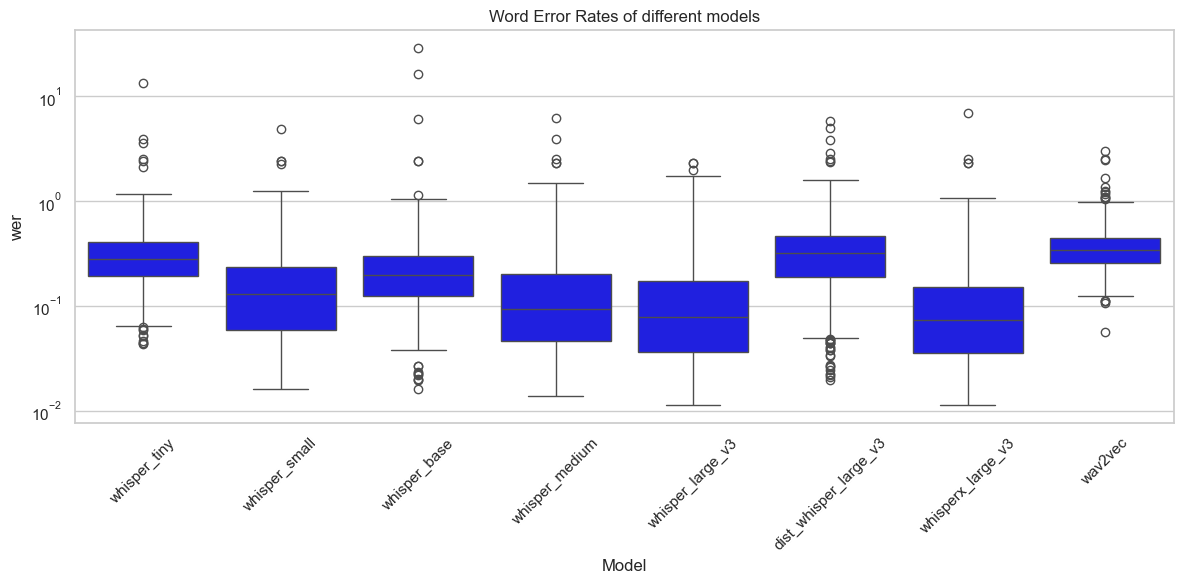

In [81]:
# Concatenate all WER values into a single array
wer_values = np.concatenate([df["wer"].values for df in results_dfs.values()])

# Create a DataFrame with flattened WER values
sample_wers_df = pd.DataFrame({
    "Model": np.repeat(list(results_dfs.keys()), [len(df) for df in results_dfs.values()]),
    "wer": wer_values,
})

# Plot boxplot
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")
sns.boxplot(data=sample_wers_df, x="Model", y="wer", color="blue", log_scale=True)
plt.xticks(rotation=45)
plt.title("Word Error Rates of different models")
plt.tight_layout()
plt.show()

In [93]:
for model, df in results_dfs.items():
    best_sample = df.sort_values("wer").iloc[0]
    print(f"Best sample for {model}:")
    print("-" * 30)
    print(f"Audio path: {best_sample['audio_path']}")
    display(Audio(best_sample["audio_path"]))
    print("-" * 30)
    print(f"Ground truth:            {best_sample['gt']}")
    print(f"Prediction:              {best_sample['decoded_output']}")
    print("-" * 30)
    print(f"Normalized ground truth: {best_sample['normalized_gt']}")
    print(f"Normalized prediction:   {best_sample['normalized_decoded_output']}")
    print("-" * 30)
    print(f"WER: {best_sample['wer']}")
    print(); print(); print()

Best sample for whisper_tiny:
------------------------------
Audio path: F:/BIG_FILES/AI_DATA/2024_STT\4K2Pm82lBi8\segments\segment_03.mp3


------------------------------
Ground truth:            Weil wir ja immer mehr Emissionen einsparen müssen. Dadurch wird der CO2-Preis immer höher, die Anreize, Emissionen zu sparen, werden also immer stärker. 2) CO2-Steuer oder CO2-Abgabe Bei dieser Methode wird von der Regierung nicht das Gesamtbudget festgelegt, sondern ein Preis für CO2.
Prediction:              weil wir ja immer mehr Emissionen einsparen müssen. Dadurch wird der CO2-Preis immer höher die Anreize-Emissionen zu sparen werden also immer stärker. Zweitens CO2 steuer oder CO2 abgabe. Bei dieser Methode wird von der Regierung nicht das Gesambudget festgelegt, sondern ein Preis für CO2.
------------------------------
Normalized ground truth: weil wir ja immer mehr emissionen einsparen muessen dadurch wird der co2 preis immer hoeher die anreize emissionen zu sparen werden also immer staerker 2 co2 steuer oder co2 abgabe bei dieser methode wird von der regierung nicht das gesamtbudget festgelegt sondern ein preis fuer co2


------------------------------
Ground truth:            Der Konzern ist längst selbst als Verkäufer auf der eigenen Seite unterwegs und bewirbt seine Produkte aggressiv. Vertrauliche Daten von anderen Anbietern werden eingesehen, um eigene Kopien zu launchen. Die Konkurrenz wird schonungslos ausgemerzt. Daten sind Macht. Und einige wenige Unternehmen haben unfassbar viel davon.
Prediction:              Der Konzern ist längst selbst als Verkäufer auf der eigenen Seite unterwegs und bewirbt seine Produkte aggressiv. Vertrauliche Daten von anderen Anbietern werden eingesehen, um eigene Kopien zu launchen. Die Konkurrenz wird schonungslos ausgemerzt. Daten sind Macht und einige wenige Unternehmen haben unfassbar viel davon.
------------------------------
Normalized ground truth: der konzern ist laengst selbst als verkaeufer auf der eigenen seite unterwegs und bewirbt seine produkte aggressiv vertrauliche daten von anderen anbietern werden eingesehen um eigene kopien zu launchen die konkurr

------------------------------
Ground truth:            wenn überhaupt. Doch es sei gar nicht die Traurigkeit gewesen, die sie seit ihrer Kindheit fertig machte. Es war die Abwesenheit von Hoffnung. Die Hoffnung darauf, dass sie irgendwann wieder Freude empfinden kann. Dass ihre Eltern endlich versuchen, zu verstehen, was sie belastet.
Prediction:              wenn überhaupt. Doch es sei gar nicht die Traurigkeit gewesen, die sie seit ihrer Kindheit fertig machte. Es war die Abwesenheit von Hoffnung. Die Hoffnung darauf, dass sie irgendwann wieder Freude empfinden kann. Dass ihre Eltern endlich versuchen zu verstehen, was sie belastet.
------------------------------
Normalized ground truth: wenn ueberhaupt doch es sei gar nicht die traurigkeit gewesen die sie seit ihrer kindheit fertig machte es war die abwesenheit von hoffnung die hoffnung darauf dass sie irgendwann wieder freude empfinden kann dass ihre eltern endlich versuchen zu verstehen was sie belastet
Normalized prediction:   w

------------------------------
Ground truth:            Doch zunächst hat er in der Schule zu kämpfen, denn Recep ist kein besonders guter Schüler. Das ändert sich, laut einer Biografin, erst in der fünften Klasse, als der Direktor das Zimmer betritt. Nachdem dieser den Boden mit Zeitungen ausgelegt hat, fordert er Recep auf, vor der Klasse zu beten. Doch der weigert sich, weil es im strengen Islam ein Bilderverbot gibt.
Prediction:              Doch zunächst hat er in der Schule zu kämpfen, denn Recep ist kein besonders guter Schüler. Das ändert sich laut einer Biografin erst in der fünften Klasse, als der Direktor das Zimmer betritt. Nachdem dieser den Boden mit Zeitungen ausgelegt hat, fordert er Recep auf, vor der Klasse zu beten. Doch der weigert sich, weil es im strengen Islam ein Bilderverbot gibt.
------------------------------
Normalized ground truth: doch zunaechst hat er in der schule zu kaempfen denn recep ist kein besonders guter schueler das aendert sich laut einer biogra

------------------------------
Ground truth:            wie erreichen wir die Masse? Und der Erfolg gibt ja am Ende von den Einschaltquoten auch manchmal recht. Aber gerade die Einschaltquoten vom aktuellen Bachelor zeigen ja, dass sich das auch ein bisschen ausgesendet hat. Also keiner möchte mehr sehen, wie 20 Frauen einem Mann hinterherlaufen und es passiert nichts
Prediction:              Wie erreichen wir die Masse? Und der Erfolg gibt ja am Ende von den Einschaltquoten auch manchmal recht. Aber gerade die Einschaltquoten vom aktuellen Bachelor zeigen ja, dass sich das auch ein bisschen ausgesendet hat. Also keiner möchte mehr sehen, wie 20 Frauen einem Mann hinterherlaufen und es passiert nichts.
------------------------------
Normalized ground truth: wie erreichen wir die masse und der erfolg gibt ja am ende von den einschaltquoten auch manchmal recht aber gerade die einschaltquoten vom aktuellen bachelor zeigen ja dass sich das auch ein bisschen ausgesendet hat also keiner moec

------------------------------
Ground truth:            Ohne seinen Freund Friedrich hätte es das Werk von Karl wohl nie gegeben, weiß man heute. Karl konnte die geschichtlichen Entwicklungen nicht mehr miterleben, aber es war sicher nicht in seinem Interesse, dass einige seine Ideen missbrauchten. Regimes wie das der Sowjetunion und der DDR bauten eine Art Scheinsozialismus auf,
Prediction:              Ohne seinen Freund Friedrich hätte es das Werk von Karl wohl nie gegeben, weiss man heute. Karl konnte die geschichtlichen Entwicklungen nicht mehr miterleben, aber es war sicher nicht in seinem Interesse, dass einige seine Ideen missbrauchten. Regimes wie das der Sowjetunion und der DDR bauten eine Art Scheinsozialismus auf.
------------------------------
Normalized ground truth: ohne seinen freund friedrich haette es das werk von karl wohl nie gegeben weiss man heute karl konnte die geschichtlichen entwicklungen nicht mehr miterleben aber es war sicher nicht in seinem interesse dass 

------------------------------
Ground truth:            die ja sowieso schon erhöht ist, was zu Pickeln und zu Akne führen kann. Auch hier sind bisher nur Zusammenhänge, also Korrelationen, und keine direkten Kausalitäten nachgewiesen. Aber man kann ja mal durch Milchverzicht einen Selbsttest machen und schauen, was es einem bringt. Denn eins ist klar, eine gesunde Ernährung ist sicherlich auch möglich ohne Milch.
Prediction:              die ja sowieso schon erhöht ist, was zu Pickeln und zu Akne führen kann. Auch hier sind bisher nur Zusammenhänge, also Korrelationen und keine direkten Kausalitäten nachgewiesen. Aber man kann ja mal durch Milchverzicht einen Selbsttest machen und schauen, was es einem bringt. Denn eins ist klar, eine gesunde Ernährung ist sicherlich auch möglich ohne Milch.
------------------------------
Normalized ground truth: die ja sowieso schon erhoeht ist was zu pickeln und zu akne fuehren kann auch hier sind bisher nur zusammenhaenge also korrelationen und kei

------------------------------
Ground truth:            zerstören keine Ernten und sorgen gleichzeitig für mehr Artenvielfalt. Die Papageien haben einfach nur eine Nische besetzt, die in Deutschland frei war. Den Anblick der schönen bunten Vögel sollte man deshalb am besten einfach genießen. (Ruhige Musik)
Prediction:              zerstören keine ernten und sorgen gleichzeitig für mehr artenvielfalt die papageien haben einfach nur eine nische besetzt die in deutschland frei war den anblick der schönen bunten vögel solte man deshalb am besten einfach geniesencs
------------------------------
Normalized ground truth: zerstoeren keine ernten und sorgen gleichzeitig fuer mehr artenvielfalt die papageien haben einfach nur eine nische besetzt die in deutschland frei war den anblick der schoenen bunten voegel sollte man deshalb am besten einfach geniessen
Normalized prediction:   zerstoeren keine ernten und sorgen gleichzeitig fuer mehr artenvielfalt die papageien haben einfach nur eine nisch

In [92]:
for model, df in results_dfs.items():
    worst_sample = df.sort_values("wer").iloc[-1]
    print(f"Worst sample for {model}:")
    print("-" * 30)
    print(f"Audio path: {worst_sample['audio_path']}")
    display(Audio(worst_sample['audio_path']))
    print("-" * 30)
    print(f"Ground truth:            {worst_sample['gt']}")
    print(f"Prediction:              {worst_sample['decoded_output']}")
    print("-" * 30)
    print(f"Normalized ground truth: {worst_sample['normalized_gt']}")
    print(f"Normalized prediction:   {worst_sample['normalized_decoded_output']}")
    print("-" * 30)
    print(f"WER: {worst_sample['wer']}")
    print(); print(); print()

Worst sample for whisper_tiny:
------------------------------
Audio path: F:/BIG_FILES/AI_DATA/2024_STT\G16FNoJO8M8\segments\segment_11.mp3


------------------------------
Ground truth:            Das Versprechen der private Prisoners war simpel Mehr Insassen, weniger Kosten, weniger Problem. Aber dieses Versprechen hat sich ziemlich schnell in Luft aufgelöst.
Prediction:              Das Versprechen der Private Prisons war simple. Mehr in Sachsen, weniger Kosten, weniger Problem. Aber dieses Versprechen hat sich ziemlich schnell in Luft aufgelöst. Wir lernen, weil wir nicht, dass wir nicht, dass wir nicht, dass wir nicht, dass wir nicht, dass wir nicht, dass wir nicht, dass wir nicht, dass wir nicht, dass wir nicht, dass wir nicht, dass wir nicht, dass wir nicht, dass wir nicht, dass wir nicht, dass wir nicht, dass wir nicht, dass wir nicht, dass wir nicht, dass wir nicht, dass wir nicht, dass wir nicht, dass wir nicht, dass wir nicht, dass wir nicht, dass wir nicht, dass wir nicht, dass wir nicht, dass wir nicht, dass wir nicht, dass wir nicht, dass wir nicht, dass wir nicht, dass wir nicht, dass wir nicht, dass wir nicht

------------------------------
Ground truth:            (Bewegte Musik) "Please!" "Please!" "God!" (brüllt:) "Oh my God! Yes! Whoo!"
Prediction:              Du weißt, dass du so viel hast, wie du die Gänge machen kannst. Jeden Moment, als du investierst, fühlst du dich wie ein Reworderer und du hast den Wert gegeben. Oh mein Gott! Ja! Mach sicher, dass deine Gänge sind.
------------------------------
Normalized ground truth: please  please  god   oh my god yes whoo
Normalized prediction:   du weisst dass du so viel hast wie du die gaenge machen kannst jeden moment als du investierst fuehlst du dich wie ein reworderer und du hast den wert gegeben oh mein gott ja mach sicher dass deine gaenge sind
------------------------------
WER: 4.875



Worst sample for whisper_base:
------------------------------
Audio path: F:/BIG_FILES/AI_DATA/2024_STT\UhUzyTVpaVA\segments\segment_16.mp3


------------------------------
Ground truth:            (Bewegte Musik) "Please!" "Please!" "God!" (brüllt:) "Oh my God! Yes! Whoo!"
Prediction:              Wir haben so viel zu tun, dass die Games wir machen können. Alle Momente, die wir investieren, ihr die Spielwelt, ihr die Worte und ihr die Value geben. Oh mein Gott! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nein! Nei

------------------------------
Ground truth:            (Bewegte Musik) "Please!" "Please!" "God!" (brüllt:) "Oh my God! Yes! Whoo!"
Prediction:              Wir wissen, dass ihr so viel in die Spiele, die wir machen, so viel in die Leben gelegt habt. Jeder Moment, den ihr investiert, fühlt sich an, als seht ihr euch als Reward und ihr seid von Wert gegeben. Es sagt wirklich etwas, aber ein Spiel macht EA fast ethisch.
------------------------------
Normalized ground truth: please  please  god   oh my god yes whoo
Normalized prediction:   wir wissen dass ihr so viel in die spiele die wir machen so viel in die leben gelegt habt jeder moment den ihr investiert fuehlt sich an als seht ihr euch als reward und ihr seid von wert gegeben es sagt wirklich etwas aber ein spiel macht ea fast ethisch
------------------------------
WER: 6.25



Worst sample for whisper_large_v3:
------------------------------
Audio path: F:/BIG_FILES/AI_DATA/2024_STT\czzrPQIg54Q\segments\segment_10.mp3


------------------------------
Ground truth:            Zweitens: Beides wird in Prozent angegeben. Zum Beispiel: Dann bedeutet das, dass unter den Nichtinfizierten,
Prediction:              Zweitens Spezifität. Je spezifischer ein Test ist, desto genauer kann er nicht infizierte Personen korrekt als negativ identifizieren. Das heißt, je höher die Spezifität, desto weniger falsch positive Ergebnisse kriegt man. Beides wird in Prozent angegeben, zum Beispiel Spezifität gleich 95%. Dann bedeutet das, dass unter den nicht Infizierten
------------------------------
Normalized ground truth: zweitens beides wird in prozent angegeben zum beispiel dann bedeutet das dass unter den nichtinfizierten
Normalized prediction:   zweitens spezifitaet je spezifischer ein test ist desto genauer kann er nicht infizierte personen korrekt als negativ identifizieren das heisst je hoeher die spezifitaet desto weniger falsch positive ergebnisse kriegt man beides wird in prozent angegeben zum beispiel spezifita

------------------------------
Ground truth:            All das dokumentiert er mit seiner Kamera. Er erklärt den anderen KFA-Mitgliedern, die Videos könne man super für nordkoreanische Propaganda auf YouTube verwenden.
Prediction:              All das dokumentiert er mit seiner Kamera. Er erklärt den anderen K F A mitgliedern, die Videos könne man super für nordkoreanische Propaganda auf YouTube verwendeten. I Lophekoreans, und ich liebteam, und die hat sich jung in North Korea waren sieong in North Korea, In North Korea, Theintern, dass sich jungen, In, Inow, all das medintern, all das Seben, all das Seufkoreen, all das Seufkoreen, all das Seufkoreen, all das Seufkoreen, all das Seufkoreen, all das Seufkoreen, all das Seufkoreen, all das Seufkoreen, all das Seufkoreen, all das Seufkoreen, all das Seufkoreen, all das Seufkoreen, all das Seufkoreen, all das Seufkoreen, all das Seych, all das Seych, all das Seych, all das Seych, all das Seych, all das Seych, all das Seychon, all das Sey

------------------------------
Ground truth:            (Bewegte Musik) "Please!" "Please!" "God!" (brüllt:) "Oh my God! Yes! Whoo!"
Prediction:              We know that you put so much of your life into the games we make. Every moment you invest, you feel like you are rewarded and you are given value. Make sure that your games aren't too skill-based. Explore and fight. It's really saying something when a game almost makes EA look ethical.
------------------------------
Normalized ground truth: please  please  god   oh my god yes whoo
Normalized prediction:   we know that you put so much of your life into the games we make every moment you invest you feel like you are rewarded and you are given value make sure that your games aren t too skill based explore and fight it s really saying something when a game almost makes ea look ethical
------------------------------
WER: 7.0



Worst sample for wav2vec:
------------------------------
Audio path: F:/BIG_FILES/AI_DATA/2024_STT\UhUzyTVpaV

------------------------------
Ground truth:            (Bewegte Musik) "Please!" "Please!" "God!" (brüllt:) "Oh my God! Yes! Whoo!"
Prediction:              i neudetkurz so mach obiomat udeledenicen emeiebeham umdas di fya-pygode eniotiven dalimratondeskobast ist nfait it schnelich scheinksam unein gangber mus mit iangle erdegoren
------------------------------
Normalized ground truth: please  please  god   oh my god yes whoo
Normalized prediction:   i neudetkurz so mach obiomat udeledenicen emeiebeham umdas di fya pygode eniotiven dalimratondeskobast ist nfait it schnelich scheinksam unein gangber mus mit iangle erdegoren
------------------------------
WER: 3.0



